<a href="https://colab.research.google.com/github/pkolakal/IT7103/blob/main/pkolakal_Assignment4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

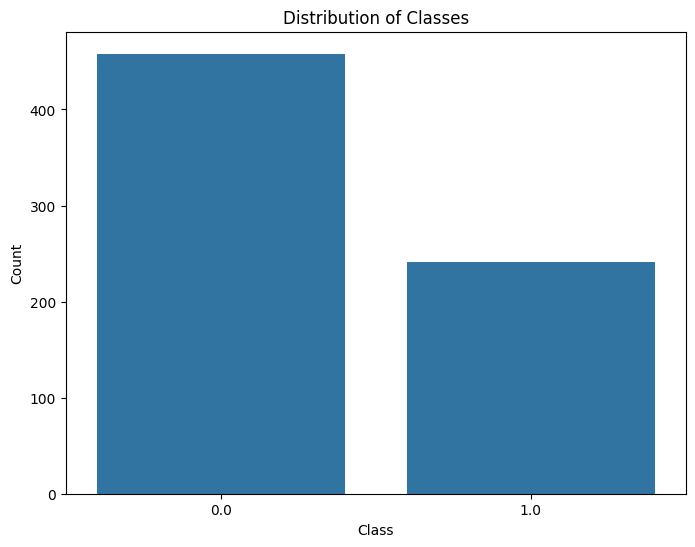

In [19]:
# Import necessary libraries
import pandas as pd                 # For data manipulation and analysis
import numpy as np                  # For numerical operations
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score  # For model selection and evaluation
from sklearn.svm import SVC         # For Support Vector Machine algorithm
from sklearn.metrics import accuracy_score  # For evaluating the model's accuracy
import matplotlib.pyplot as plt     # For plotting
import seaborn as sns               # For data visualization

# Load the data
data_path = 'breast-cancer.csv'     # Path to the dataset
data = pd.read_csv(data_path)       # Read the dataset into a DataFrame

# Prepare the data
# Drop 'ID' column and separate features and target variable
X = data.drop(columns=['ID', 'Class'])  # Features (independent variables)
y = data['Class']                      # Target variable (dependent variable)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# 70% of data for training, 30% for testing, random_state for reproducibility

# Visualizations

# Distribution of Classes
plt.figure(figsize=(8, 6))          # Set the figure size
sns.countplot(x='Class', data=data)  # Create a count plot of the target variable
plt.title('Distribution of Classes')  # Title of the plot
plt.xlabel('Class')                 # Label for the x-axis
plt.ylabel('Count')                 # Label for the y-axis
plt.show()                          # Display the plot


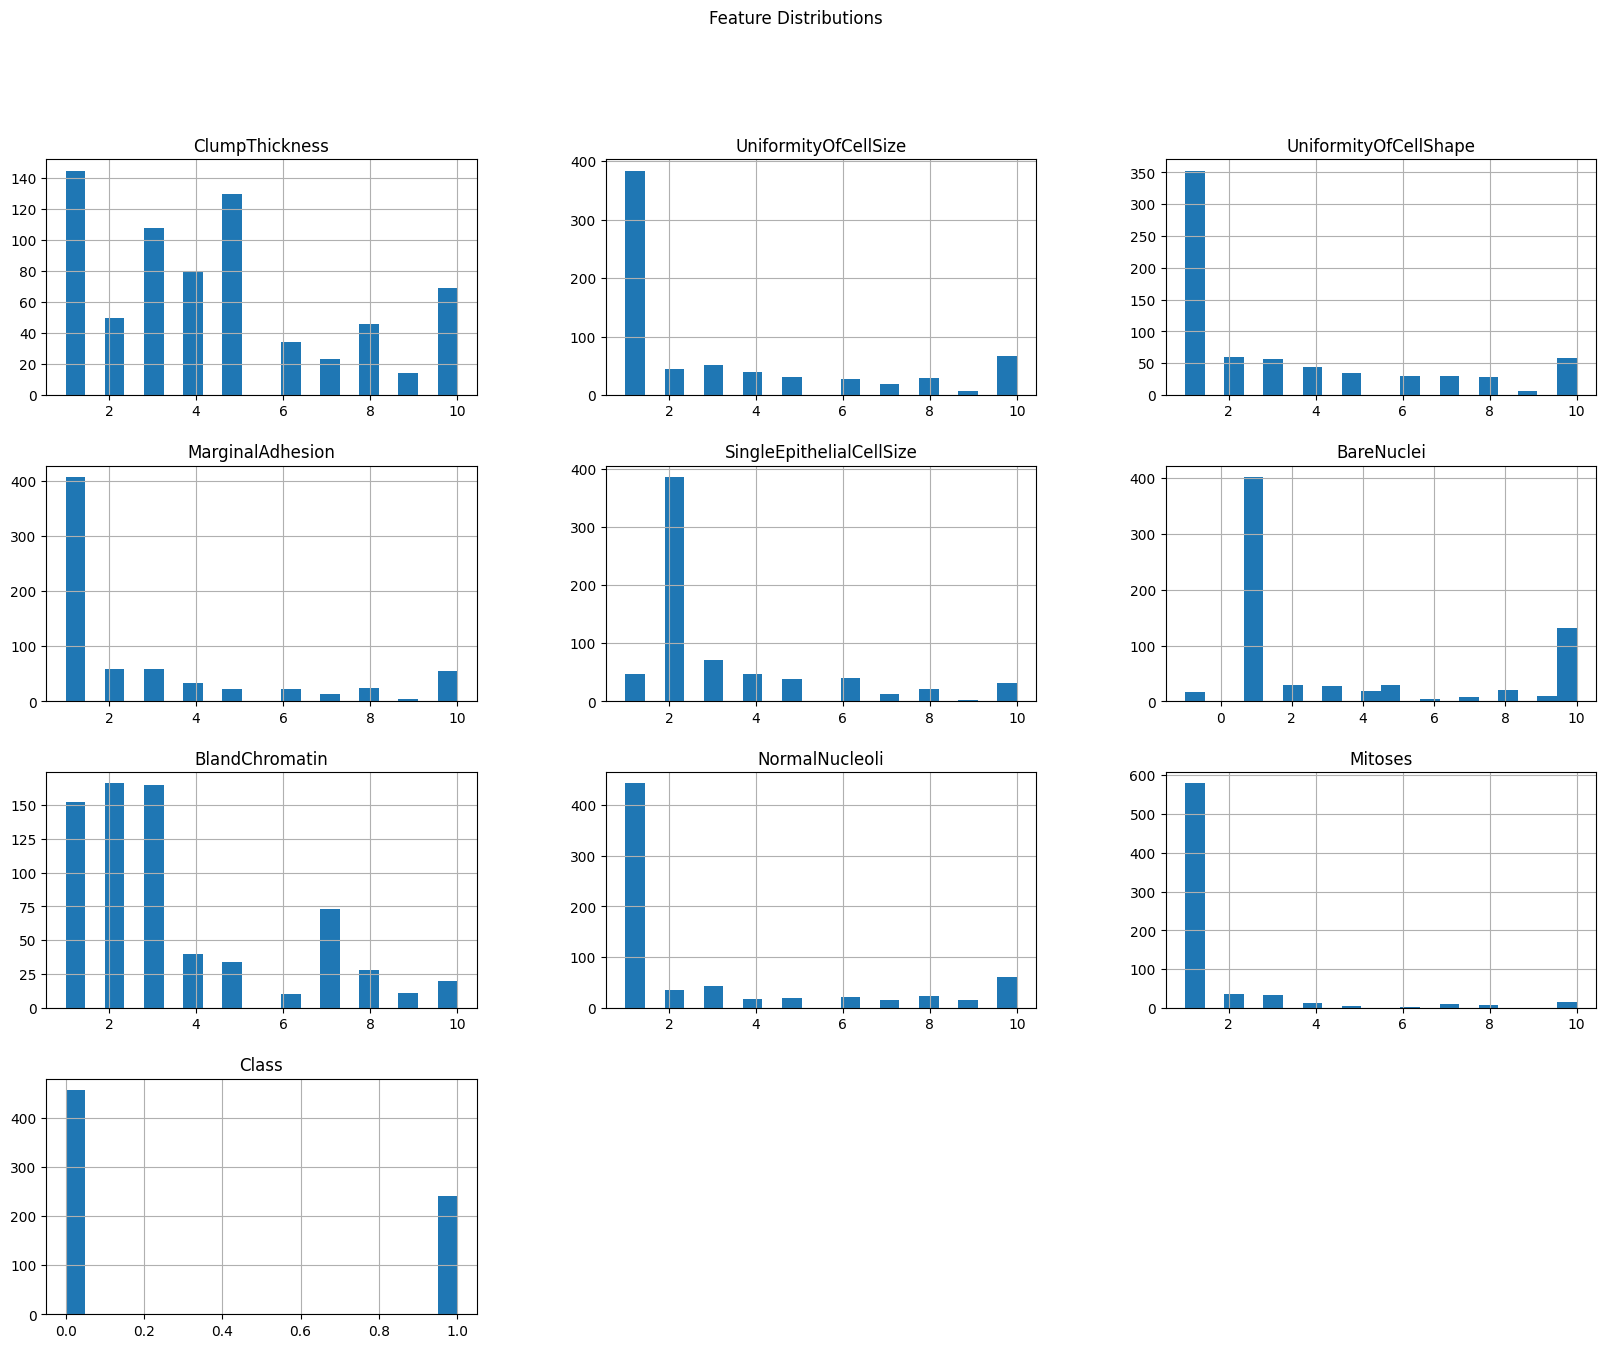

In [20]:
# Feature Distributions
data.drop(columns=['ID']).hist(bins=20, figsize=(20, 15))  # Drop 'ID' column and plot histograms for all features with 20 bins, set figure size
plt.suptitle('Feature Distributions')  # Title for the entire figure
plt.show()  # Display the plots


In [21]:
# Linear SVM
linear_svc = SVC(kernel='linear')  # Initialize the Support Vector Classifier with a linear kernel
linear_params = {'C': [0.1, 1, 10, 100, 1000]}  # Set the range of hyperparameter 'C' to be tested
linear_grid = GridSearchCV(linear_svc, linear_params, cv=5)  # Initialize GridSearchCV with 5-fold cross-validation
linear_grid.fit(X_train, y_train)  # Fit the model to the training data to find the best parameters


GridSearchCV(cv=5, estimator=SVC(kernel='linear'),
             param_grid={'C': [0.1, 1, 10, 100, 1000]})

In [22]:
# Best parameters and cross-validation score for Linear SVM
best_linear_svc = linear_grid.best_estimator_  # Retrieve the best estimator from the grid search
linear_train_score = cross_val_score(best_linear_svc, X_train, y_train, cv=5).mean()  # Calculate mean cross-validation score on training data
linear_test_score = accuracy_score(y_test, best_linear_svc.predict(X_test))  # Calculate accuracy score on test data

# Kernel SVM with RBF kernel
rbf_svc = SVC(kernel='rbf')  # Initialize SVM with RBF kernel
rbf_params = {'C': [0.1, 1, 10, 100, 1000], 'gamma': [1e-3, 1e-4, 1e-5, 1e-6]}  # Set parameters to search over
rbf_grid = GridSearchCV(rbf_svc, rbf_params, cv=5)  # Initialize GridSearchCV with 5-fold cross-validation
rbf_grid.fit(X_train, y_train)  # Fit the model to the training data

# Best parameters and cross-validation score for RBF SVM
best_rbf_svc = rbf_grid.best_estimator_  # Retrieve the best estimator from the grid search
rbf_train_score = cross_val_score(best_rbf_svc, X_train, y_train, cv=5).mean()  # Calculate mean cross-validation score on training data
rbf_test_score = accuracy_score(y_test, best_rbf_svc.predict(X_test))  # Calculate accuracy score on test data

# Kernel SVM with Linear kernel
kernel_linear_svc = SVC(kernel='linear')  # Initialize SVM with linear kernel
kernel_linear_grid = GridSearchCV(kernel_linear_svc, linear_params, cv=5)  # Initialize GridSearchCV with 5-fold cross-validation
kernel_linear_grid.fit(X_train, y_train)  # Fit the model to the training data

# Best parameters and cross-validation score for Kernel Linear SVM
best_kernel_linear_svc = kernel_linear_grid.best_estimator_  # Retrieve the best estimator from the grid search
kernel_linear_train_score = cross_val_score(best_kernel_linear_svc, X_train, y_train, cv=5).mean()  # Calculate mean cross-validation score on training data
kernel_linear_test_score = accuracy_score(y_test, best_kernel_linear_svc.predict(X_test))  # Calculate accuracy score on test data

# Reporting the results
print(f"Linear SVM - Best Parameters: {linear_grid.best_params_}")
print(f"Linear SVM - Training Accuracy: {linear_train_score}")
print(f"Linear SVM - Testing Accuracy: {linear_test_score}")

Linear SVM - Best Parameters: {'C': 1}
Linear SVM - Training Accuracy: 0.9672838207447928
Linear SVM - Testing Accuracy: 0.9666666666666667


In [23]:
print(f"RBF Kernel SVM - Best Parameters: {rbf_grid.best_params_}")
print(f"RBF Kernel SVM - Training Accuracy: {rbf_train_score}")
print(f"RBF Kernel SVM - Testing Accuracy: {rbf_test_score}")

RBF Kernel SVM - Best Parameters: {'C': 10, 'gamma': 0.001}
RBF Kernel SVM - Training Accuracy: 0.9652219650746897
RBF Kernel SVM - Testing Accuracy: 0.9666666666666667


In [24]:

print(f"Linear Kernel SVM - Best Parameters: {kernel_linear_grid.best_params_}")
print(f"Linear Kernel SVM - Training Accuracy: {kernel_linear_train_score}")
print(f"Linear Kernel SVM - Testing Accuracy: {kernel_linear_test_score}")


Linear Kernel SVM - Best Parameters: {'C': 1}
Linear Kernel SVM - Training Accuracy: 0.9672838207447928
Linear Kernel SVM - Testing Accuracy: 0.9666666666666667


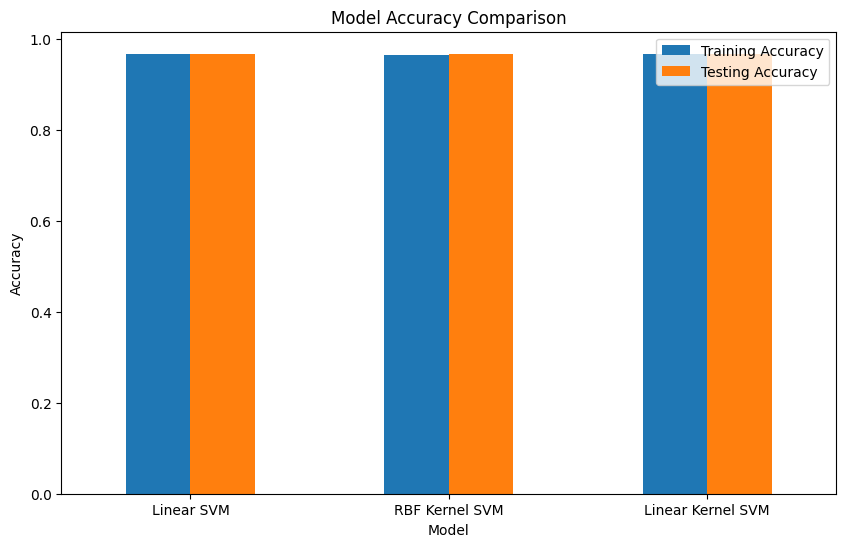

In [25]:
# Accuracy Comparison
results = pd.DataFrame({
    'Model': ['Linear SVM', 'RBF Kernel SVM', 'Linear Kernel SVM'],  # Models names
    'Training Accuracy': [linear_train_score, rbf_train_score, kernel_linear_train_score],  # Training accuracy scores
    'Testing Accuracy': [linear_test_score, rbf_test_score, kernel_linear_test_score]  # Testing accuracy scores
})

# Plotting
results.plot(x='Model', y=['Training Accuracy', 'Testing Accuracy'], kind='bar', figsize=(10, 6))  # Bar plot for training and testing accuracies
plt.title('Model Accuracy Comparison')  # Title of the plot
plt.ylabel('Accuracy')  # Label for the y-axis
plt.xticks(rotation=0)  # Rotate x-axis labels for better readability
plt.show()  # Display the plot
